### Figure 1b conida concentration count

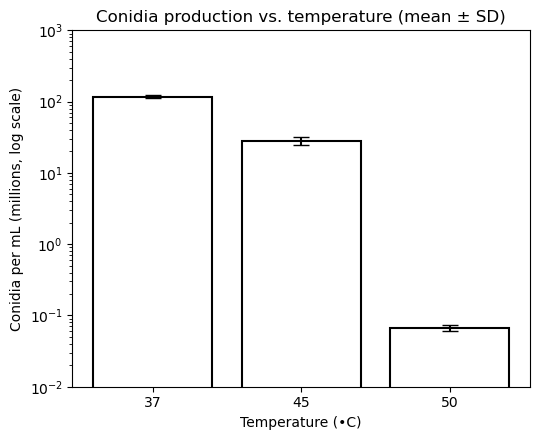

Saved figure: conidia_per_ml_barplot_clean.png


In [10]:
# Conidia bar plot with stats: black bars + log y-axis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

# ------------------ 1) Data ------------------
data = [
    {"temp": "37", "per_ml": 112_000_000, "total_5ml": 560_000_000},
    {"temp": "37", "per_ml": 123_000_000, "total_5ml": 615_000_000},
    {"temp": "37", "per_ml": 115_000_000, "total_5ml": 575_000_000},

    {"temp": "45", "per_ml": 23_900_000, "total_5ml": 119_500_000},
    {"temp": "45", "per_ml": 30_500_000, "total_5ml": 152_500_000},
    {"temp": "45", "per_ml": 29_600_000, "total_5ml": 148_000_000},

    {"temp": "50", "per_ml": 60_000, "total_5ml": 300_000},
    {"temp": "50", "per_ml": 70_000, "total_5ml": 350_000},
    {"temp": "50", "per_ml": 70_000, "total_5ml": 350_000},
]

df = pd.DataFrame(data)
df["per_ml_million"] = df["per_ml"] / 1e6  # for readable axis units

# ------------------ 2) Descriptive stats ------------------
summary = (
    df.groupby("temp", sort=False)["per_ml_million"]
      .agg(["count", "mean", "std"])
      .reset_index()
)

# ------------------ 3) ANOVA + Tukey (optional) ------------------
groups = [df.loc[df["temp"]==t, "per_ml_million"].values for t in summary["temp"]]
anova_stat, anova_p = f_oneway(*groups)
tukey = pairwise_tukeyhsd(endog=df["per_ml_million"], groups=df["temp"], alpha=0.05)

# ------------------ 4) Plot (white fill, black outline, no grid) ------------------
labels = summary["temp"].tolist()
means = summary["mean"].values
errs = summary["std"].values

fig, ax = plt.subplots(figsize=(5.5, 4.5))
x = np.arange(len(labels))

ax.bar(x, means, yerr=errs, capsize=6, color="white", edgecolor="black", linewidth=1.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Conidia per mL (millions, log scale)")
ax.set_xlabel("Temperature (•C)")
ax.set_title("Conidia production vs. temperature (mean ± SD)")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-2, top=1000)   # adjust these values as you like

# Remove all gridlines and spines cleanup
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)

plt.tight_layout()

# ------------------ 5) Save figure ------------------
plot_path = Path("conidia_per_ml_barplot_clean.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure: {plot_path}")


### Figure 1c growth of wt strain in liquid culture

Saved figure: growth_barplot_ku80.png
Saved Tukey table: tukey_results_growth_ku80.csv
ANOVA: F = 67.589, p = 2.140e-12

Tukey HSD:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    37     45    40.05   0.0   20.9626  59.1374   True
    37     50    -50.2   0.0  -69.2874 -31.1126   True
    45     50   -90.25   0.0 -109.3374 -71.1626   True
------------------------------------------------------


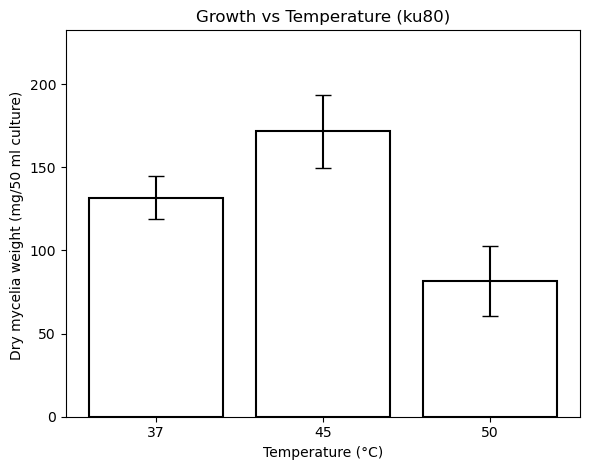

In [12]:
# Bar plot (mean ± SD) for Growth vs Temperature, white fill + black outline, no grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from io import StringIO
from pathlib import Path

# -------- 1) Paste data ----------
csv_text = """Temperature,Strain,Growth
37,ku80,137.7
37,ku80,134.7
37,ku80,118.7
37,ku80,122.7
37,ku80,141.5
37,ku80,124.5
37,ku80,122.5
37,ku80,136.6
37,ku80,132.8
37,ku80,164
37,ku80,115
37,ku80,130
45,ku80,185.9
45,ku80,188.1
45,ku80,123.1
45,ku80,175.2
45,ku80,182.3
45,ku80,173.6
45,ku80,193.9
45,ku80,188.5
45,ku80,191.7
45,ku80,161
45,ku80,150
45,ku80,148
50,ku80,104.2
50,ku80,83.9
50,ku80,53.7
50,ku80,59.2
50,ku80,66.5
50,ku80,84.2
50,ku80,81.9
50,ku80,85.5
50,ku80,105.2
50,ku80,82
50,ku80,119
50,ku80,53
"""
df = pd.read_csv(StringIO(csv_text))

# Ensure consistent temperature order on the x-axis
temp_order = [37, 45, 50]
df["Temperature"] = pd.Categorical(df["Temperature"], categories=temp_order, ordered=True)

# (Optional) filter to a strain if multiple are present
strain_to_plot = "ku80"
df_plot = df[df["Strain"] == strain_to_plot].copy()

# -------- 2) Summary stats ----------
summary = (
    df_plot.groupby("Temperature")["Growth"]
           .agg(["count", "mean", "std"])
           .reset_index()
)

# -------- 3) Stats: one-way ANOVA + Tukey ----------
groups = [df_plot.loc[df_plot["Temperature"] == t, "Growth"].values for t in temp_order]
F, p = f_oneway(*groups)

tukey = pairwise_tukeyhsd(endog=df_plot["Growth"], groups=df_plot["Temperature"], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# -------- 4) Plot (white fill, black outline, no grid) ----------
labels = summary["Temperature"].tolist()
means  = summary["mean"].values
errs   = summary["std"].values

fig, ax = plt.subplots(figsize=(6, 4.8))
x = np.arange(len(labels))

ax.bar(x, means, yerr=errs, capsize=6, color="white", edgecolor="black", linewidth=1.5)
ax.set_xticks(x)
ax.set_xticklabels([str(l) for l in labels])
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Dry mycelia weight (mg/50 ml culture) ")
ax.set_title(f"Growth vs Temperature ({strain_to_plot})")

# No gridlines
ax.grid(False)

# Nice y-limits: start at 0, add 20% headroom above highest mean+SD
y_top = float(np.nanmax(means + errs)) * 1.2
ax.set_ylim(bottom=0, top=y_top)

plt.tight_layout()

# -------- 5) Save outputs ----------
out_dir = Path(".")
fig_path = out_dir / f"growth_barplot_{strain_to_plot}.png"
tukey_path = out_dir / f"tukey_results_growth_{strain_to_plot}.csv"
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
tukey_df.to_csv(tukey_path, index=False)

# Console summary
print(f"Saved figure: {fig_path}")
print(f"Saved Tukey table: {tukey_path}")
print(f"ANOVA: F = {F:.3f}, p = {p:.3e}")
print("\nTukey HSD:")
print(tukey)

plt.show()


Saved figure: growth_barplot_ku80.png
Saved Tukey table: tukey_results_growth_ku80.csv
ANOVA: F = 125.396, p = 1.037e-21

Tukey HSD:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
    30     37   128.35    0.0   99.4131  157.2869   True
    30     45    168.4    0.0  139.4631  197.3369   True
    30     50    78.15    0.0   49.2131  107.0869   True
    30     55   -3.375 0.9987  -38.8153   32.0653  False
    37     45    40.05    0.0   19.5885   60.5115   True
    37     50    -50.2    0.0  -70.6615  -29.7385   True
    37     55 -131.725    0.0 -160.6619 -102.7881   True
    45     50   -90.25    0.0 -110.7115  -69.7885   True
    45     55 -171.775    0.0 -200.7119 -142.8381   True
    50     55  -81.525    0.0 -110.4619  -52.5881   True
--------------------------------------------------------


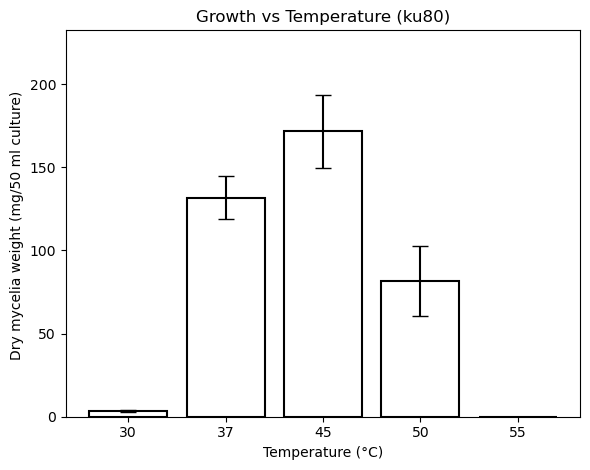

In [3]:
# Bar plot (mean ± SD) for Growth vs Temperature, white fill + black outline, no grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from io import StringIO
from pathlib import Path

# -------- 1) Paste data ----------
csv_text = """Temperature,Strain,Growth
37,ku80,137.7
37,ku80,134.7
37,ku80,118.7
37,ku80,122.7
37,ku80,141.5
37,ku80,124.5
37,ku80,122.5
37,ku80,136.6
37,ku80,132.8
37,ku80,164
37,ku80,115
37,ku80,130
45,ku80,185.9
45,ku80,188.1
45,ku80,123.1
45,ku80,175.2
45,ku80,182.3
45,ku80,173.6
45,ku80,193.9
45,ku80,188.5
45,ku80,191.7
45,ku80,161
45,ku80,150
45,ku80,148
50,ku80,104.2
50,ku80,83.9
50,ku80,53.7
50,ku80,59.2
50,ku80,66.5
50,ku80,84.2
50,ku80,81.9
50,ku80,85.5
50,ku80,105.2
50,ku80,82
50,ku80,119
50,ku80,53
30,ku80,3.9
30,ku80,2.7
30,ku80,3.7
30,ku80,3.2
55,ku80,0
55,ku80,0
55,ku80,0
55,ku80,0
"""
df = pd.read_csv(StringIO(csv_text))

# Ensure consistent temperature order on the x-axis
temp_order = [30, 37, 45, 50, 55]
df["Temperature"] = pd.Categorical(df["Temperature"], categories=temp_order, ordered=True)

# (Optional) filter to a strain if multiple are present
strain_to_plot = "ku80"
df_plot = df[df["Strain"] == strain_to_plot].copy()

# -------- 2) Summary stats ----------
summary = (
    df_plot.groupby("Temperature")["Growth"]
           .agg(["count", "mean", "std"])
           .reset_index()
)

# -------- 3) Stats: one-way ANOVA + Tukey ----------
groups = [df_plot.loc[df_plot["Temperature"] == t, "Growth"].values for t in temp_order]
F, p = f_oneway(*groups)

tukey = pairwise_tukeyhsd(endog=df_plot["Growth"], groups=df_plot["Temperature"], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# -------- 4) Plot (white fill, black outline, no grid) ----------
labels = summary["Temperature"].tolist()
means  = summary["mean"].values
errs   = summary["std"].values

fig, ax = plt.subplots(figsize=(6, 4.8))
x = np.arange(len(labels))

ax.bar(x, means, yerr=errs, capsize=6, color="white", edgecolor="black", linewidth=1.5)
ax.set_xticks(x)
ax.set_xticklabels([str(l) for l in labels])
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Dry mycelia weight (mg/50 ml culture) ")
ax.set_title(f"Growth vs Temperature ({strain_to_plot})")

# No gridlines
ax.grid(False)

# Nice y-limits: start at 0, add 20% headroom above highest mean+SD
y_top = float(np.nanmax(means + errs)) * 1.2
ax.set_ylim(bottom=0, top=y_top)

plt.tight_layout()

# -------- 5) Save outputs ----------
out_dir = Path(".")
fig_path = out_dir / f"growth_barplot_{strain_to_plot}.png"
tukey_path = out_dir / f"tukey_results_growth_{strain_to_plot}.csv"
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
tukey_df.to_csv(tukey_path, index=False)

# Console summary
print(f"Saved figure: {fig_path}")
print(f"Saved Tukey table: {tukey_path}")
print(f"ANOVA: F = {F:.3f}, p = {p:.3e}")
print("\nTukey HSD:")
print(tukey)

plt.show()
